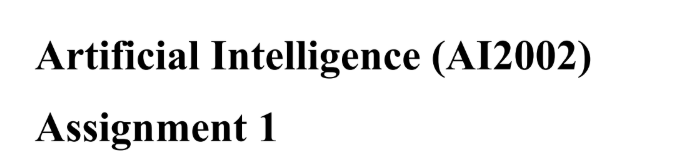

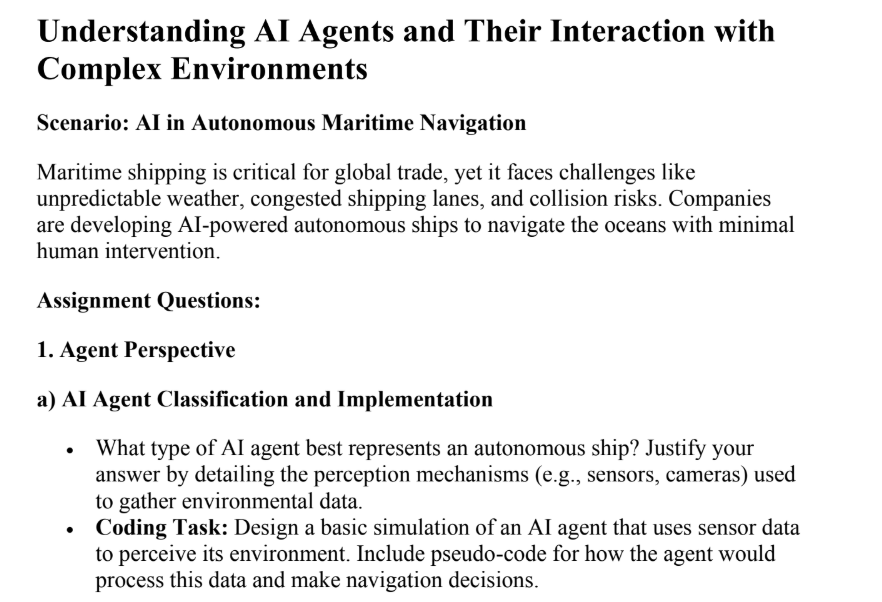

In [20]:
import random

class Percept:
    # Represents the data received from sensors.
    def __init__(self, obstacle_distance, weather_condition, traffic_density, fuel_level):
        self.obstacle_distance = obstacle_distance  
        self.weather_condition = weather_condition 
        self.traffic_density = traffic_density 
        self.fuel_level = fuel_level 

class ShipAgent:
    # AI agent that makes navigation decisions based on percepts.
    def __init__(self, destination="Port B"):
        self.speed = 20  
        self.direction = 'Straight'
        self.internal_state = {}  
        self.destination = destination  # Goal-Based Behavior
    
    def update_model(self, percept):
        #Updates internal world model with new percept data.
        self.internal_state['last_weather'] = percept.weather_condition
        self.internal_state['last_obstacle_distance'] = percept.obstacle_distance
    
    def calculate_utility(self, percept):
        #Evaluates different options to maximize efficiency and safety.
        utility = 100  # Start with max utility
        
        # Safety factor
        if percept.obstacle_distance < 50:
            utility -= 50  # High penalty for close obstacles
        
        # Efficiency factor (fuel level)
        if percept.fuel_level < 20:
            utility -= 30  # Penalize low fuel levels
        
        # Time factor (traffic congestion)
        if percept.traffic_density > 7:
            utility -= 20  # Slow navigation reduces efficiency
        
        return utility

    def agent_program(self, percept):
        #Decision-making based on percepts, goals, and utility.
        self.update_model(percept)  # Update internal state

        # Adjust speed based on weather conditions
        if percept.weather_condition == 'Stormy':
            self.speed = max(5, self.speed - 10)  
        elif percept.weather_condition == 'Foggy':
            self.speed = max(10, self.speed - 5)
        else:
            self.speed = min(25, self.speed + 5) 
        
        # Avoid collision if an obstacle is too close
        if percept.obstacle_distance < 50:
            self.direction = 'Turn Left'
        elif percept.obstacle_distance < 100:
            self.direction = 'Turn Right'
        else:
            self.direction = 'Straight'
        
        # Adjust speed based on traffic density
        if percept.traffic_density > 5:
            self.speed = max(10, self.speed - 5)

        # Use utility-based decision-making
        utility = self.calculate_utility(percept)
        if utility < 50:
            self.speed = max(5, self.speed - 5)  # Slow down for safety
        
        return f"Speed: {self.speed} knots, Direction: {self.direction}, Utility Score: {utility}, Destination: {self.destination}"


for _ in range(5): 
    obstacle_distance = random.randint(10, 500)  
    weather_condition = random.choice(['Clear', 'Foggy', 'Stormy'])
    traffic_density = random.randint(0, 10)  
    fuel_level = random.randint(10, 100)  # New: Fuel level added
        
    percept = Percept(obstacle_distance, weather_condition, traffic_density, fuel_level)
    ship = ShipAgent()
    decision = ship.agent_program(percept)
        
    print(f"Percepts -> Obstacle: {percept.obstacle_distance}m, Weather: {percept.weather_condition}, Traffic: {percept.traffic_density}, Fuel: {percept.fuel_level}%")
    print(f"Decision -> {decision}\n")


Percepts -> Obstacle: 199m, Weather: Foggy, Traffic: 0, Fuel: 32%
Decision -> Speed: 15 knots, Direction: Straight, Utility Score: 100, Destination: Port B

Percepts -> Obstacle: 44m, Weather: Clear, Traffic: 2, Fuel: 81%
Decision -> Speed: 25 knots, Direction: Turn Left, Utility Score: 50, Destination: Port B

Percepts -> Obstacle: 263m, Weather: Foggy, Traffic: 6, Fuel: 59%
Decision -> Speed: 10 knots, Direction: Straight, Utility Score: 100, Destination: Port B

Percepts -> Obstacle: 328m, Weather: Foggy, Traffic: 5, Fuel: 23%
Decision -> Speed: 15 knots, Direction: Straight, Utility Score: 100, Destination: Port B

Percepts -> Obstacle: 100m, Weather: Stormy, Traffic: 1, Fuel: 58%
Decision -> Speed: 10 knots, Direction: Straight, Utility Score: 100, Destination: Port B



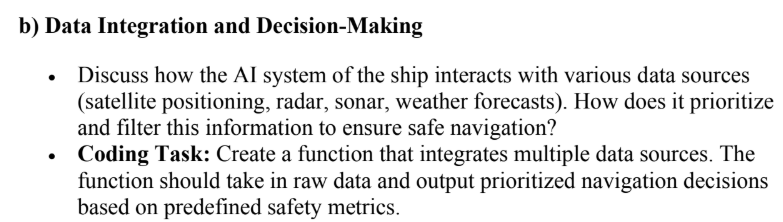

In [21]:
import random

class ShipAI:
    #AI system that integrates multiple data sources for navigation decisions.
    def __init__(self):
        self.speed = 20  
        self.direction = 'Straight'
    
    def process_data(self, gps, radar, sonar, weather, ais):
        """
        Prioritizes and filters data to ensure safe navigation.
        - High Priority: Immediate obstacle avoidance (Radar, Sonar).
        - Medium Priority: Weather adaptation (Weather forecast).
        - Medium Priority: Traffic avoidance (AIS - Automatic Identification System).
        - Low Priority: Route optimization (GPS guidance).
        """
        
        # 1. High-Priority: Immediate Collision Avoidance (Radar & Sonar)
        if radar < 50 or sonar < 30:
            self.direction = 'Turn Left' if radar < sonar else 'Turn Right'
            self.speed = max(5, self.speed - 10)  
        
        # 2. Medium-Priority: Weather Adaptation
        elif weather in ['Stormy', 'Foggy']:
            self.speed = max(10, self.speed - 5)  
        
        # 3. Medium-Priority: Traffic Avoidance (AIS - Nearby Ships)
        elif ais < 100:  # If another ship is within 100m
            self.direction = 'Adjust Course'
            self.speed = max(10, self.speed - 5)  
        
        # 4. Low-Priority: Route Optimization (GPS Guidance)
        else:
            self.direction = 'Straight'
            self.speed = min(25, self.speed + 5)  
        
        return f"Speed: {self.speed} knots, Direction: {self.direction}"


test_cases = [
    ((37.7749, -122.4194), 120, 200, 'Clear', 150),  # No obstacles, normal weather
    ((40.7128, -74.0060), 30, 50, 'Foggy', 80),  # Close obstacle + bad weather + traffic
    ((34.0522, -118.2437), 70, 20, 'Stormy', 200),  # Underwater obstacle + storm
    ((51.5074, -0.1278), 45, 100, 'Clear', 90),  # Close radar obstacle, adjust course
    ((48.8566, 2.3522), 150, 250, 'Clear', 300)  # Safe conditions, optimize speed
]

# Simulating AI decisions
ship_ai = ShipAI()
for i, case in enumerate(test_cases, 1):
    decision = ship_ai.process_data(*case)
    print(f"Test Case {i}: Navigation Decision -> {decision}")


Test Case 1: Navigation Decision -> Speed: 25 knots, Direction: Straight
Test Case 2: Navigation Decision -> Speed: 15 knots, Direction: Turn Left
Test Case 3: Navigation Decision -> Speed: 5 knots, Direction: Turn Right
Test Case 4: Navigation Decision -> Speed: 5 knots, Direction: Turn Left
Test Case 5: Navigation Decision -> Speed: 10 knots, Direction: Straight


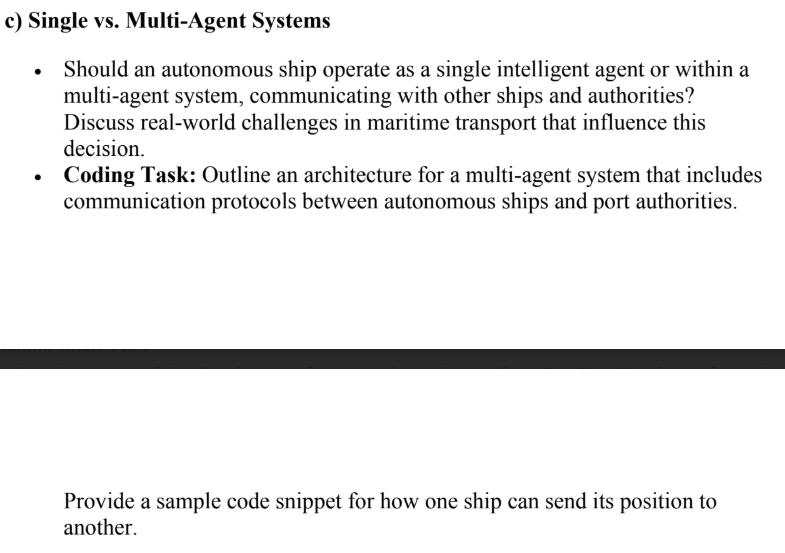

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/receive_position', methods=['POST'])
def receive_position(): #Agent function
    #Receive and process ship position data.
    data = request.json
    ship_id = data.get("ship_id")
    position = data.get("position")
    print(f"Received Position from {ship_id}: {position}")
    return jsonify({"status": "Position received"}), 200

if __name__ == '__main__':
    app.run(port=5000)

In [12]:
import requests

class ShipAgent:
    def __init__(self, ship_id, position):
        self.ship_id = ship_id
        self.position = position  # (latitude, longitude)

    def send_position(self, target_url): #Agent functon
        #Send ship position to another ship or port authority.
        data = {'ship_id': self.ship_id, 'position': self.position}
        response = requests.post(target_url, json=data)
        print(f"Sent Position: {self.position} | Response: {response.text}")

ship1 = ShipAgent("Ship_1", (37.7749, -122.4194))
ship2 = ShipAgent("Ship_2", (55.76789, -102.98789))
target_url = "http://127.0.0.1:5000/receive_position"  # Ship 2's server
ship1.send_position(target_url)
ship2.send_position(target_url)

Sent Position: (37.7749, -122.4194) | Response: {"status":"Position received"}

Sent Position: (55.76789, -102.98789) | Response: {"status":"Position received"}



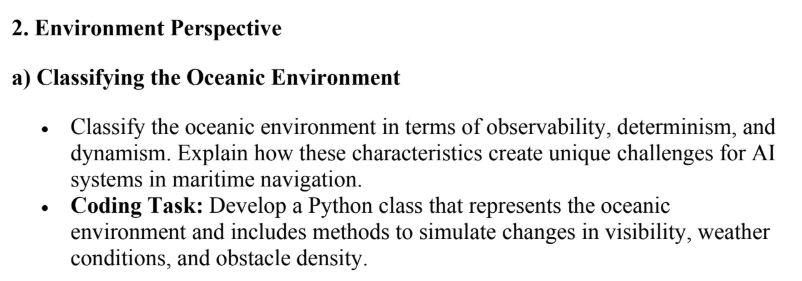

In [22]:
import random
import time

class OceanicEnvironment:
    def __init__(self, initial_visibility=100, initial_weather='Clear', initial_obstacle_density=0.1):
        self.visibility = initial_visibility  
        self.weather = initial_weather 
        self.obstacle_density = initial_obstacle_density  

    def change_visibility(self):
        #Simulates a change in visibility based on environmental factors.
        visibility_change = random.choice([-20, 0, 20])  # Random change: decrease, no change, or increase visibility
        self.visibility = max(0, min(100, self.visibility + visibility_change))  # Keep visibility in range 0-100
        print(f"Visibility changed: {self.visibility}%")

    def change_weather(self):
        #Simulates a change in weather conditions.
        weather_conditions = ['Clear', 'Foggy', 'Stormy', 'Rainy']
        self.weather = random.choice(weather_conditions)  # Randomly pick a new weather condition
        print(f"Weather changed to: {self.weather}")

    def change_obstacle_density(self):
        #Simulates a change in obstacle density.
        obstacle_change = random.uniform(-0.05, 0.05)  # Random change in obstacle density between -5% and +5%
        self.obstacle_density = max(0, min(1, self.obstacle_density + obstacle_change))  # Keep obstacle density in range 0-1
        print(f"Obstacle density changed to: {self.obstacle_density * 100}%")

    def simulate_environment(self, iterations=5, delay=2):
        #Simulates environmental changes over multiple iterations.
        for _ in range(iterations):
            self.change_visibility()
            self.change_weather()
            self.change_obstacle_density()
            time.sleep(delay)  

ocean = OceanicEnvironment(initial_visibility=80, initial_weather='Clear', initial_obstacle_density=0.15)
ocean.simulate_environment(iterations=10, delay=3)


Visibility changed: 80%
Weather changed to: Foggy
Obstacle density changed to: 17.428759191708735%
Visibility changed: 60%
Weather changed to: Stormy
Obstacle density changed to: 15.582487995259209%
Visibility changed: 60%
Weather changed to: Foggy
Obstacle density changed to: 14.917691982025602%
Visibility changed: 80%
Weather changed to: Stormy
Obstacle density changed to: 12.151476701780513%
Visibility changed: 80%
Weather changed to: Stormy
Obstacle density changed to: 9.702502790287463%
Visibility changed: 80%
Weather changed to: Rainy
Obstacle density changed to: 12.258511239999999%
Visibility changed: 60%
Weather changed to: Stormy
Obstacle density changed to: 12.681065375256622%
Visibility changed: 40%
Weather changed to: Clear
Obstacle density changed to: 14.250641271921763%
Visibility changed: 40%
Weather changed to: Stormy
Obstacle density changed to: 14.990997270678468%
Visibility changed: 20%
Weather changed to: Rainy
Obstacle density changed to: 18.52453243552354%


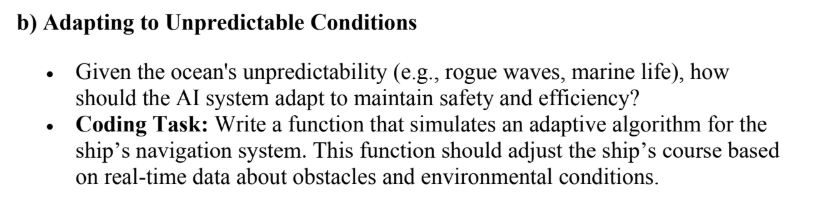

In [6]:
import random
import math

class AdaptiveNavigationSystem:
    def __init__(self, initial_course=0, visibility=100, weather='Clear', obstacle_density=0.1):
        self.course = initial_course  # Ship's current course (angle in degrees)
        self.visibility = visibility  
        self.weather = weather 
        self.obstacle_density = obstacle_density  # Fraction of obstacles in the area (0 to 1)
        self.max_course_change = 15  # Max allowed course change in degrees for safety

    def update_conditions(self, visibility, weather, obstacle_density):
        #Update environmental conditions.
        self.visibility = visibility
        self.weather = weather
        self.obstacle_density = obstacle_density

    def assess_obstacles(self):
        #Simulate detection of obstacles and adjust course accordingly.
        if self.obstacle_density > 0.5:  
            print("High obstacle density detected. Adjusting course to avoid collisions.")
            return random.randint(-self.max_course_change, self.max_course_change)
        return 0  
    def assess_weather(self):
        #Simulate weather-based course adjustment.
        if self.weather == 'Stormy': 
            print("Storm detected. Altering course to avoid storm.")
            return random.randint(-self.max_course_change, self.max_course_change)
        elif self.weather == 'Foggy' and self.visibility < 40:
            print("Low visibility due to fog. Adjusting course for safety.")
            return random.randint(-self.max_course_change // 2, self.max_course_change // 2)
        return 0  

    def navigate(self):
        #Adjust the ship's course based on real-time data.
        course_adjustment = self.assess_obstacles() + self.assess_weather()

        if course_adjustment != 0:
            self.course += course_adjustment
            self.course = max(0, min(360, self.course))  # Ensure the course stays within 0-360 degrees
            print(f"New course: {self.course}°")
        else:
            print(f"Course remains the same: {self.course}°")
        
    def simulate_navigation(self, iterations=5):
        #Simulate a series of course adjustments over time.
        for i in range(iterations):
            print(f"\nIteration {i+1}:")
            # Simulate random updates to environmental conditions
            new_visibility = random.randint(20, 100)
            new_weather = random.choice(['Clear', 'Foggy', 'Stormy'])
            new_obstacle_density = random.uniform(0, 1)
            
            # Update conditions
            self.update_conditions(new_visibility, new_weather, new_obstacle_density)
            print(f"Updated conditions: Visibility={self.visibility}%, Weather={self.weather}, Obstacle Density={self.obstacle_density * 100}%")
            self.navigate()

nav_system = AdaptiveNavigationSystem(initial_course=90, visibility=80, weather='Clear', obstacle_density=0.2)
nav_system.simulate_navigation(iterations=5)



Iteration 1:
Updated conditions: Visibility=82%, Weather=Foggy, Obstacle Density=39.64330672534345%
Course remains the same: 90°

Iteration 2:
Updated conditions: Visibility=70%, Weather=Stormy, Obstacle Density=35.54587664057328%
Storm detected. Altering course to avoid storm.
New course: 89°

Iteration 3:
Updated conditions: Visibility=41%, Weather=Stormy, Obstacle Density=32.75101440003571%
Storm detected. Altering course to avoid storm.
New course: 102°

Iteration 4:
Updated conditions: Visibility=51%, Weather=Foggy, Obstacle Density=63.59473328673899%
High obstacle density detected. Adjusting course to avoid collisions.
Course remains the same: 102°

Iteration 5:
Updated conditions: Visibility=38%, Weather=Foggy, Obstacle Density=24.98247445980083%
Low visibility due to fog. Adjusting course for safety.
New course: 109°


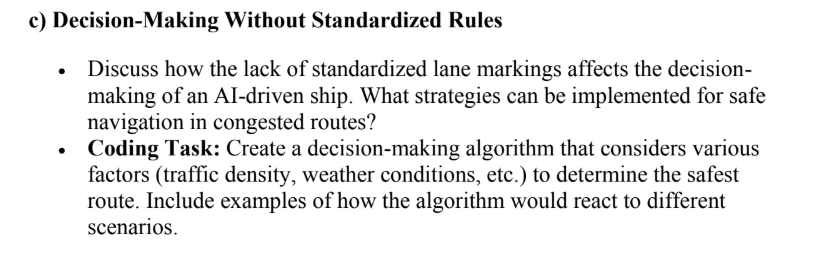

In [13]:
WEATHER_CONDITIONS = ["clear", "fog", "storm", "high-wind"]
TRAFFIC_DENSITY = ["low", "moderate", "high"]
OBSTACLES = ["none", "small", "large"]  

class AutonomousShip:
    def __init__(self, current_position, destination, speed, weather, traffic_density, obstacles):
        self.current_position = current_position
        self.destination = destination
        self.speed = speed
        self.weather = weather
        self.traffic_density = traffic_density
        self.obstacles = obstacles
        self.route = []

    def decide_route(self):
        #Decides the safest route based on traffic, weather, obstacles, and current position.
        # If there are obstacles, first take action to avoid them
        if self.obstacles != "none":
            self.route.append("maneuver to avoid obstacles")

        # Weather-based decision-making
        if self.weather == "storm" or self.weather == "high-wind":
            self.route.append("slow down")
            self.route.append("take detour to safer waters")
        elif self.weather == "fog":
            self.route.append("increase sensor sensitivity")
            self.route.append("proceed with caution")
        elif self.weather == "clear":
            self.route.append("maintain speed and course")

        # Traffic-based decision-making
        if self.traffic_density == "high":
            self.route.append("reduce speed")
            self.route.append("adjust course to avoid congestion")
        elif self.traffic_density == "moderate":
            self.route.append("maintain speed but stay alert")
        elif self.traffic_density == "low":
            self.route.append("maintain speed")

        # Final action to proceed towards the destination
        self.route.append(f"navigate towards {self.destination}")

    def display_route(self):
        print(f"Ship at {self.current_position} heading to {self.destination}")
        print("Recommended Actions:")
        for action in self.route:
            print(action)

# Scenario 1: Ship in clear weather and low traffic with no obstacles
ship1 = AutonomousShip(current_position="Port A", destination="Port B", speed=20, weather="clear", traffic_density="low", obstacles="none")
ship1.decide_route()
ship1.display_route()

# Scenario 2: Ship in stormy weather with high traffic and large obstacles
ship2 = AutonomousShip(current_position="Port C", destination="Port D", speed=15, weather="storm", traffic_density="high", obstacles="large")
ship2.decide_route()
ship2.display_route()

# Scenario 3: Ship in foggy weather with moderate traffic and small obstacles
ship3 = AutonomousShip(current_position="Port E", destination="Port F", speed=18, weather="fog", traffic_density="moderate", obstacles="small")
ship3.decide_route()
ship3.display_route()


Ship at Port A heading to Port B
Recommended Actions:
maintain speed and course
maintain speed
navigate towards Port B
Ship at Port C heading to Port D
Recommended Actions:
maneuver to avoid obstacles
slow down
take detour to safer waters
reduce speed
adjust course to avoid congestion
navigate towards Port D
Ship at Port E heading to Port F
Recommended Actions:
maneuver to avoid obstacles
increase sensor sensitivity
proceed with caution
maintain speed but stay alert
navigate towards Port F
